# Telecom Churn Case Study

##### First we will import required libraries and also, ignore warnings

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

#### Reading and Checking Data

In [2]:
telecom_df= pd.read_csv('telecom_churn_data.csv')

In [3]:
telecom_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [4]:
telecom_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

In [5]:
telecom_df.shape

(99999, 226)

In [6]:
x=len(telecom_df)
x

99999

In [7]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [8]:
round(100*(telecom_df.isnull().sum())/len(telecom_df),2)

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_month_6         0.00
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou

In [9]:
print(telecom_df.columns.tolist())

['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2t_mou_9', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou

In [10]:
rech_cols = []
for i in telecom_df.columns:
    if 'rech' in i:
        rech_cols.append(i)

In [11]:
rech_cols

['total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_num_9',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'total_rech_amt_9',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'max_rech_amt_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9']

In [12]:
telecom_df[rech_cols].describe()

,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000
mean,7.558806,7.700367,7.212912,6.893019,327.514615,322.962970,324.157122,303.345673,104.637486,104.752398,107.728207,101.943889,2.463802,2.666419,2.651999,2.441170,126.393392,126.729459,125.717301,124.94144,1.864668,2.044699,2.016288,1.781807,0.599133,0.621720,0.635711,0.659363,192.600982,200.981292,197.526489,192.734315
std,7.078405,7.070422,7.203753,7.096261,398.019701,408.114237,416.540455,404.588583,120.614894,124.523970,126.902505,125.375109,2.789128,3.031593,3.074987,2.516339,108.477235,109.765267,109.437851,111.36376,2.570254,2.768332,2.720132,2.214701,1.274428,1.394524,1.422827,1.411513,192.646318,196.791224,191.301305,188.400286
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.500000,1.000000
25%,3.000000,3.000000,3.000000,3.000000,109.000000,100.000000,90.000000,52.000000,30.000000,30.000000,30.000000,28.000000,1.000000,1.000000,1.000000,1.000000,25.000000,25.000000,25.000000,25.00000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,82.000000,92.000000,87.000000,69.000000
50%,6.000000,6.000000,5.000000,5.000000,230.000000,220.000000,225.000000,200.000000,110.000000,110.000000,98.000000,61.000000,1.000000,1.000000,1.000000,2.000000,145.000000,145.000000,145.000000,145.00000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,154.000000,154.000000,154.000000,164.000000
75%,9.000000,10.000000,9.000000,9.000000,437.500000,428.000000,434.500000,415.000000,120.000000,128.000000,144.000000,144.000000,3.000000,3.000000,3.000000,3.000000,177.000000,177.000000,179.000000,179.00000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,252.000000,252.000000,252.000000,252.000000
max,307.000000,138.000000,196.000000,131.000000,35190.000000,40335.000000,45320.000000,37235.000000,4010.000000,4010.000000,4449.000000,3399.000000,61.000000,54.000000,60.000000,84.000000,1555.000000,1555.000000,1555.000000,1555.00000,42.000000,48.000000,44.000000,40.000000,29.000000,35.000000,45.000000,49.000000,7546.000000,4365.000000,4076.000000,4061.000000


In [13]:
round(100*(telecom_df[rech_cols].isnull().sum())/len(telecom_df[rech_cols]),2)

total_rech_num_6             0.00
total_rech_num_7             0.00
total_rech_num_8             0.00
total_rech_num_9             0.00
total_rech_amt_6             0.00
total_rech_amt_7             0.00
total_rech_amt_8             0.00
total_rech_amt_9             0.00
max_rech_amt_6               0.00
max_rech_amt_7               0.00
max_rech_amt_8               0.00
max_rech_amt_9               0.00
date_of_last_rech_6          1.61
date_of_last_rech_7          1.77
date_of_last_rech_8          3.62
date_of_last_rech_9          4.76
date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_8    73.66
date_of_last_rech_data_9    74.08
total_rech_data_6           74.85
total_rech_data_7           74.43
total_rech_data_8           73.66
total_rech_data_9           74.08
max_rech_data_6             74.85
max_rech_data_7             74.43
max_rech_data_8             73.66
max_rech_data_9             74.08
count_rech_2g_6             74.85
count_rech_2g_

We can observe that, there are a lot of missing values in some data.

We have to observe that, when date of last recharge and amount of recharge is missing, then the recharge might have not happened and we can impute the value with Zero.

So, we will impute total recharge data, max recharge data and average recharge amount data with zero.

In [14]:
impute_0 = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9']

In [15]:
telecom_df[impute_0] = telecom_df[impute_0].apply(lambda x: x.fillna(0))

In [16]:
telecom_df[impute_0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   total_rech_data_6   99999 non-null  float64
 1   total_rech_data_7   99999 non-null  float64
 2   total_rech_data_8   99999 non-null  float64
 3   total_rech_data_9   99999 non-null  float64
 4   max_rech_data_6     99999 non-null  float64
 5   max_rech_data_7     99999 non-null  float64
 6   max_rech_data_8     99999 non-null  float64
 7   max_rech_data_9     99999 non-null  float64
 8   av_rech_amt_data_6  99999 non-null  float64
 9   av_rech_amt_data_7  99999 non-null  float64
 10  av_rech_amt_data_8  99999 non-null  float64
 11  av_rech_amt_data_9  99999 non-null  float64
dtypes: float64(12)
memory usage: 9.2 MB


In [17]:
round(100*(telecom_df.isnull().sum())/len(telecom_df),2)

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_month_6         0.00
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou

Next, we remove columns with more than 40% Missing Values

In [18]:
telecom_df = telecom_df[telecom_df.columns[telecom_df.isna().sum()<(len(telecom_df)*0.4)]]

In [19]:
telecom_df.shape

(99999, 198)

In [20]:
round(100*(telecom_df.isnull().sum())/len(telecom_df),2)

mobile_number           0.00
circle_id               0.00
loc_og_t2o_mou          1.02
std_og_t2o_mou          1.02
loc_ic_t2o_mou          1.02
last_date_of_month_6    0.00
last_date_of_month_7    0.60
last_date_of_month_8    1.10
last_date_of_month_9    1.66
arpu_6                  0.00
arpu_7                  0.00
arpu_8                  0.00
arpu_9                  0.00
onnet_mou_6             3.94
onnet_mou_7             3.86
onnet_mou_8             5.38
onnet_mou_9             7.75
offnet_mou_6            3.94
offnet_mou_7            3.86
offnet_mou_8            5.38
offnet_mou_9            7.75
roam_ic_mou_6           3.94
roam_ic_mou_7           3.86
roam_ic_mou_8           5.38
roam_ic_mou_9           7.75
roam_og_mou_6           3.94
roam_og_mou_7           3.86
roam_og_mou_8           5.38
roam_og_mou_9           7.75
loc_og_t2t_mou_6        3.94
loc_og_t2t_mou_7        3.86
loc_og_t2t_mou_8        5.38
loc_og_t2t_mou_9        7.75
loc_og_t2m_mou_6        3.94
loc_og_t2m_mou

In [21]:
telecom_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 198 columns):
 #    Column                Dtype  
---   ------                -----  
 0    mobile_number         int64  
 1    circle_id             int64  
 2    loc_og_t2o_mou        float64
 3    std_og_t2o_mou        float64
 4    loc_ic_t2o_mou        float64
 5    last_date_of_month_6  object 
 6    last_date_of_month_7  object 
 7    last_date_of_month_8  object 
 8    last_date_of_month_9  object 
 9    arpu_6                float64
 10   arpu_7                float64
 11   arpu_8                float64
 12   arpu_9                float64
 13   onnet_mou_6           float64
 14   onnet_mou_7           float64
 15   onnet_mou_8           float64
 16   onnet_mou_9           float64
 17   offnet_mou_6          float64
 18   offnet_mou_7          float64
 19   offnet_mou_8          float64
 20   offnet_mou_9          float64
 21   roam_ic_mou_6         float64
 22   roam_ic_mou_7       

Next, we impute categorical columns with Mode

In [22]:
cat_col = ['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9']

In [23]:
telecom_df.fillna(telecom_df.select_dtypes(include='object').mode().iloc[0], inplace=True)

Impute Numerical Columns with Median

In [24]:
telecom_df.fillna(telecom_df.select_dtypes(include='float64').median().iloc[0], inplace=True)

In [25]:
telecom_df.fillna(telecom_df.select_dtypes(include='int64').median().iloc[0], inplace=True)

Check the Missing Values

In [26]:
round(100*(telecom_df.isnull().sum())/len(telecom_df),2)

mobile_number           0.0
circle_id               0.0
loc_og_t2o_mou          0.0
std_og_t2o_mou          0.0
loc_ic_t2o_mou          0.0
last_date_of_month_6    0.0
last_date_of_month_7    0.0
last_date_of_month_8    0.0
last_date_of_month_9    0.0
arpu_6                  0.0
arpu_7                  0.0
arpu_8                  0.0
arpu_9                  0.0
onnet_mou_6             0.0
onnet_mou_7             0.0
onnet_mou_8             0.0
onnet_mou_9             0.0
offnet_mou_6            0.0
offnet_mou_7            0.0
offnet_mou_8            0.0
offnet_mou_9            0.0
roam_ic_mou_6           0.0
roam_ic_mou_7           0.0
roam_ic_mou_8           0.0
roam_ic_mou_9           0.0
roam_og_mou_6           0.0
roam_og_mou_7           0.0
roam_og_mou_8           0.0
roam_og_mou_9           0.0
loc_og_t2t_mou_6        0.0
loc_og_t2t_mou_7        0.0
loc_og_t2t_mou_8        0.0
loc_og_t2t_mou_9        0.0
loc_og_t2m_mou_6        0.0
loc_og_t2m_mou_7        0.0
loc_og_t2m_mou_8    

With this, we completed Missing Value Imputation.

Next, we filter High Value Customers (HVC)

We need to filter customers those are precious to the company.

As per Pareto rule, we need to filter customers as 80% of the revenue is generated by top 20% of the Customers.

But, in this particular case study, we will be looking at the top 30% so as to not reduce the data points for training a machine leaening model.

To do this, we will considering the data from Good Phase which is month 6 and 7.

Full recharge Amount is total recharge amount + total data recharge amount

In [27]:
telecom_df.avg_rech_6_7 = (telecom_df.total_rech_amt_6+telecom_df.total_rech_amt_7)/2

In [28]:
telecom_df.avg_rech_6_7.quantile(0.7)

368.5

In [29]:
hvc_df = telecom_df.loc[telecom_df.avg_rech_6_7 >=telecom_df.avg_rech_6_7.quantile(0.7)]

In [30]:
hvc_df.shape

(30011, 198)

Next, we derive the target column and for this we use the month 9 data, beacause as per problem statement, month 9 is the Churn Phase.

Here we will be looking at the Usage based churn which is where incoming, outgoing and data services (3g and 2g) is also inactive.

In [31]:
hvc_df['churn'] = hvc_df.apply(lambda i: 1 if (i.total_ic_mou_9 == 0 and i.total_og_mou_9 == 0 and i.vol_2g_mb_9 == 0  and i.vol_3g_mb_9 ==0)else 0, axis =1)

In [32]:
hvc_df.churn.value_counts(normalize=True)

0    0.913598
1    0.086402
Name: churn, dtype: float64

In [33]:
hvc_df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30011 entries, 7 to 99997
Data columns (total 199 columns):
 #    Column                Dtype  
---   ------                -----  
 0    mobile_number         int64  
 1    circle_id             int64  
 2    loc_og_t2o_mou        float64
 3    std_og_t2o_mou        float64
 4    loc_ic_t2o_mou        float64
 5    last_date_of_month_6  object 
 6    last_date_of_month_7  object 
 7    last_date_of_month_8  object 
 8    last_date_of_month_9  object 
 9    arpu_6                float64
 10   arpu_7                float64
 11   arpu_8                float64
 12   arpu_9                float64
 13   onnet_mou_6           float64
 14   onnet_mou_7           float64
 15   onnet_mou_8           float64
 16   onnet_mou_9           float64
 17   offnet_mou_6          float64
 18   offnet_mou_7          float64
 19   offnet_mou_8          float64
 20   offnet_mou_9          float64
 21   roam_ic_mou_6         float64
 22   roam_ic_mou_7       

With this we have created the churn target column

Next, we need to drop the month 9 data as it is used for creating target column and the model overfits the data.

In [34]:
nine_cols = []
for i in hvc_df.columns:
    if '9' in i:
        nine_cols.append(i)

In [35]:
hvc_df.drop(nine_cols, axis=1, inplace=True)

In [36]:
hvc_df.shape

(30011, 152)

Next, we have to derive variables. We have already derived a variable "avg_rech_6_7" which is the average recharge amounts for months 6 and 7.

So, we can drop the "total_rech_amt_6" and "total_rech_amt_7" columns.

In similar way, we can create some variables and drop the columns we have derived them from.

We can take average of Average Revenue for month 6 and 7 and drop 'arpu_6' and 'arpu_7'

In [37]:
hvc_df['avg_rech_6_7'] = (hvc_df.total_rech_amt_6+hvc_df.total_rech_amt_7)/2

In [38]:
hvc_df['avg_arpu_6_7'] = (hvc_df.arpu_6+hvc_df.arpu_7)/2

There is one more variable which is Age on Network "aon" which is in days. It can be converted in months. We will take an average number of days for a month as 30 days.

In [39]:
hvc_df['aon_mon'] = hvc_df.aon/30

Drop the columns from which we have dervired the variables.

In [40]:
hvc_df.drop(['total_rech_amt_6', 'total_rech_amt_7', 'arpu_6','arpu_7','aon'],axis=1,inplace=True)

In [41]:
hvc_df.shape

(30011, 150)

#### Exploratory Data Analysis

## Univariate Analysis

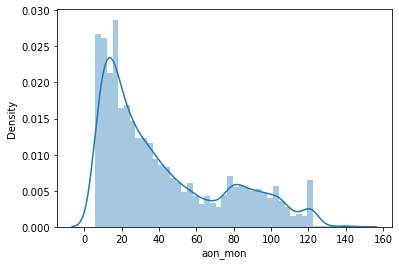

In [42]:
sns.distplot(hvc_df.aon_mon)
plt.show()

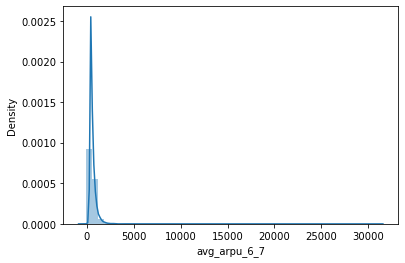

In [43]:
sns.distplot(hvc_df.avg_arpu_6_7)
plt.show()

<AxesSubplot:xlabel='avg_rech_6_7', ylabel='Density'>

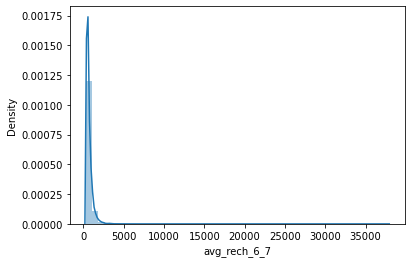

In [44]:
sns.distplot(hvc_df.avg_rech_6_7)

## Bivariate Analysis

Text(0.5, 1.0, 'Correlation Heat Map')

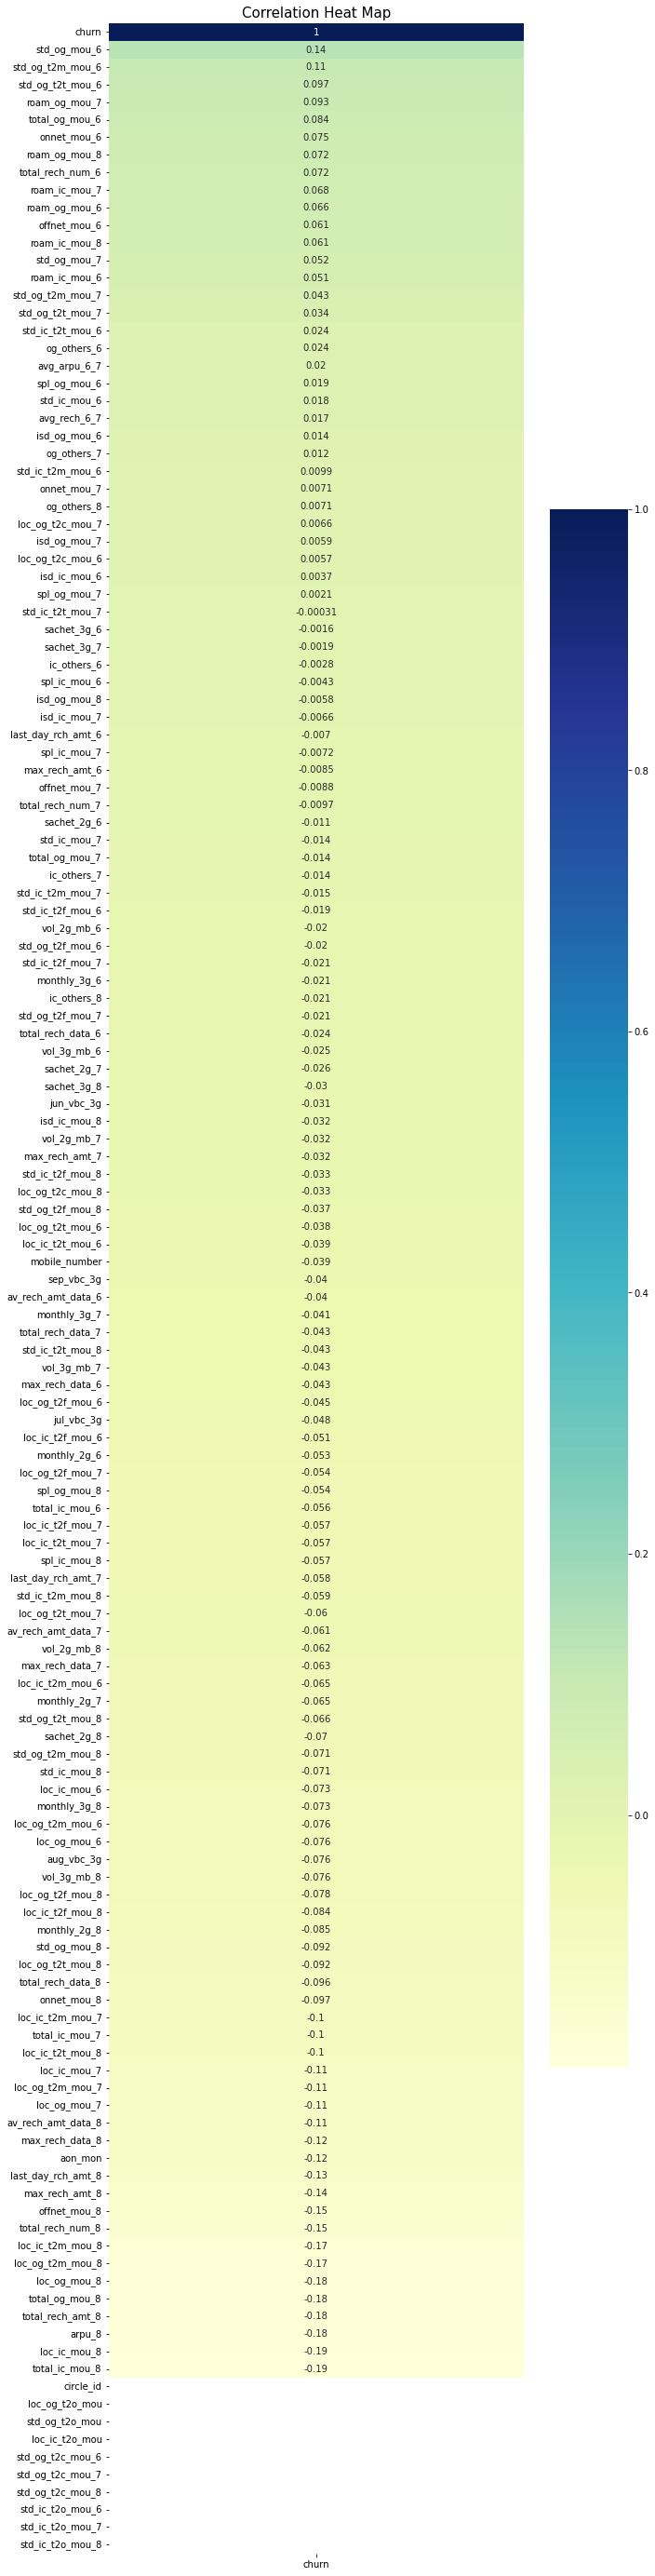

In [45]:
plt.figure(figsize=(10,50))
hmap = sns.heatmap(hvc_df.corr()[['churn']].sort_values(ascending=False, by='churn'),annot=True,cmap="YlGnBu")
hmap.set_title("Correlation Heat Map", fontsize=15)

## Outlier Analysis

In [46]:
hvc_df.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,avg_rech_6_7,avg_arpu_6_7,aon_mon
count,3.001100e+04,30011.0,30011.0,30011.0,30011.0,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.00000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.00000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.0,30011.0,30011.0,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.0,30011.0,30011.0,30011.000000,30011.00000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000
mean,7.001223e+09,109.0,0.0,0.0,0.0,534.857433,296.034461,304.343

Columns such as circle_id  and some other columns as well have same value. We will drop all those columns.

In [47]:
hvc_df.drop(['circle_id', 'loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8'],axis=1,inplace=True)

In [48]:
hvc_df.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,mobile_number,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,avg_rech_6_7,avg_arpu_6_7,aon_mon
count,3.001100e+04,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.00000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.00000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.00000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000
mean,7.001223e+09,534.857433,296.034461,304.343206,267.600412,417.933372,423.924375,375.021691,17.412764,13.522114,13.25627,29.321648,22.036003,21.469272,94.680696,95.729729,87.139995,181.279583,181.271524,167.591199,6.97933,7.097268,6.494314,1.567160,1.862229,1.712739,282.948414,284.107492,261.233938

We can observe that, there are outliers but we will leave them as is and go ahead with modeling.

In [49]:
hvc_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30011 entries, 7 to 99997
Data columns (total 140 columns):
 #    Column                Dtype  
---   ------                -----  
 0    mobile_number         int64  
 1    last_date_of_month_6  object 
 2    last_date_of_month_7  object 
 3    last_date_of_month_8  object 
 4    arpu_8                float64
 5    onnet_mou_6           float64
 6    onnet_mou_7           float64
 7    onnet_mou_8           float64
 8    offnet_mou_6          float64
 9    offnet_mou_7          float64
 10   offnet_mou_8          float64
 11   roam_ic_mou_6         float64
 12   roam_ic_mou_7         float64
 13   roam_ic_mou_8         float64
 14   roam_og_mou_6         float64
 15   roam_og_mou_7         float64
 16   roam_og_mou_8         float64
 17   loc_og_t2t_mou_6      float64
 18   loc_og_t2t_mou_7      float64
 19   loc_og_t2t_mou_8      float64
 20   loc_og_t2m_mou_6      float64
 21   loc_og_t2m_mou_7      float64
 22   loc_og_t2m_mou_8    

We can drop last_date_of_month columns as they are the same value in every cell.

In [50]:
hvc_df.drop(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8'],axis=1,inplace=True)

We will drop date of last recharge also

In [51]:
hvc_df.drop(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8'],axis=1,inplace=True)

Next, we create the X and y data sets

In [52]:
X = hvc_df.drop(['churn'], axis=1)

X.head()

,mobile_number,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_6_7,avg_arpu_6_7,aon_mon
7,7000701601,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,57.74,19.38,18.74,0.0,1185.0,1209.5150,26.733333
8,7001524846,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,120,90,154,30,50,0,10,0.0,2.0,3.0,0.0,154.0,23.0,0.0,177.0,69.0,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,21.03,910.65,122.16,0.0,519.0,435.4720,10.500000
13,7002191713,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,717,110,110,130,110,50,0,0.0,0.0,3.0,0.0,0.0,23.0,0.0,0.0,69.0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,

In [53]:
y = hvc_df['churn']

y.head()

7     1
8     0
13    0
16    0
17    0
Name: churn, dtype: int64

#### Train - Test Split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [55]:
X_train.shape

(21007, 133)

In [56]:
y_train.shape

(21007,)

In [57]:
X_train.head()

,mobile_number,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_6_7,avg_arpu_6_7,aon_mon
4715,7000476032,386.671,336.33,564.78,424.11,154.94,71.08,88.14,0.0,0.0,0.0,0.0,0.0,0.0,1.01,3.26,8.53,1.66,1.93,1.61,0.00,0.00,0.00,9.06,0.0,0.0,2.68,5.19,10.14,335.31,561.51,415.58,124.21,61.89,86.53,0.0,0.00,0.0,459.53,623.41,502.11,0.00,0.00,0.00,32.23,7.25,2.93,0.0,0.0,0.0,494.44,635.86,515.19,2.13,7.41,1.88,9.28,21.31,4.59,0.00,0.00,0.00,11.41,28.73,6.48,71.18,65.58,62.44,41.46,60.36,108.03,0.0,0.00,0.00,112.64,125.94,170.48,124.21,154.68,176.96,0.15,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,19,24,25,450,30,70,50,0,20,10,0.0,1.0,0.0,0.0,17.0,0.0,0.0,17.0,0.0,0.0,211.20,0.00,0.0,0.0,0.00,0,0,0,0,1,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,461.5,405.8095,11.766667
15222,7002362029,480.398,110.08,27.54,131.03,220.86,117.84,168.99,0.0,0.0,0.0,0.0,0.0,0.0,110.08,27.54,131.03,192.11,84.44,110.08,22.74,30.41,55.38,0.00,0.0,0.0,324.94,142.41,296.49,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,6.00,2.98,3.53,0.0,0.0,0.0,330.94,145.39,300.03,19.99,11.64,37.89,481.34,235.29,245.94,94.66,38.53,167.86,596.01,285.48,451.71,3.75,2.93,0.00,0.00,0.00,0.00,0.0,0.98,0.40,3.75,3.91,0.40,607.78,301.91,463.06,0.00,0.0,0.0,8.01,12.51,10.94,0.0,0.00,0.00,5,7,3,458,110,198,198,110,110,198,0.0,1.0,1.0,0.0,198.0,198.0,0.0,198.0,198.0,0.0,8.85,51.46,0.0,91.6,235.69,0,1,1,0,0,0,0,0,0,0,0,0,170.16,67.21,48.78,12.56,464.0,414.3470,35.866667
60145,7002395145,562.645,26.19,83.34,84.73,206.61,538.99,411.43,0.0,0.0,0.0,0.0,0.0,0.0,26.19,83.34,84.73,202.36,521.28,409.48,4.25,7.53,1.56,0.00,0.0,0.0,232.81,612.16,495.78,0.00,0.00,0.00,0.00,10.18,0.38,0.0,0.00,0.0,0.00,10.18,0.38,0.81,11.78,0.79,0.00,0.00,0.00,0.0,0.0,0.0,233.63,634.13,496.96,29.46,55.41,43.34,106.99,269.23,178.04,1.78,4.86,1.28,138.24,329.51,222.68,0.00,0.00,0.00,4.00,0.00,0.00,0.0,0.00,0.00,4.00,0.00,0.00,581.74,1244.08,774.51,0.00,0.0,0.0,439.49,914.56,551.83,0.0,0.00,0.00,12,16,15,647,30,120,50,30,120,50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,615.5,545.9825,76.066667
62445,7001527400,544.894,177.03

In [58]:
numeric = X_train.select_dtypes(include = ['int64','float64']).columns.tolist()

In [59]:
scaler = StandardScaler()

X_train[numeric] = scaler.fit_transform(X_train[numeric])

X_train.head()

,mobile_number,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_6_7,avg_arpu_6_7,aon_mon
4715,-1.096806,-0.318969,0.086147,0.528577,0.320115,-0.555878,-0.717268,-0.594406,-0.219715,-0.170559,-0.173141,-0.254904,-0.225905,-0.209478,-0.394839,-0.364770,-0.324009,-0.712013,-0.739906,-0.702254,-0.299408,-0.301536,-0.317205,1.151081,-0.212776,-0.250817,-0.732099,-0.731180,-0.672215,0.354743,0.832486,0.573021,-0.187658,-0.343679,-0.219200,-0.165637,-0.152594,-0.152592,0.109363,0.319543,0.234851,-0.047862,-0.048191,-0.045443,1.399850,-0.008382,-0.170889,-0.302525,-0.017153,-0.019525,-0.289160,-0.108047,-0.158790,-0.418591,-0.372413,-0.405483,-0.670192,-0.625857,-0.684197,-0.340041,-0.322163,-0.326399,-0.738510,-0.685464,-0.735412,0.678494,0.571342,0.626536,0.098125,0.255340,0.706536,-0.14269,-0.142729,-0.127334,0.439849,0.484375,0.836532,-0.503954,-0.430609,-0.329312,0.396055,-0.09183,-0.249042,-0.163302,-0.155238,-0.152432,-0.079485,-0.089744,-0.095158,0.715529,1.258757,1.539738,-0.293746,-0.797034,-0.575193,-0.648201,-0.719321,-0.603403,-0.580228,-0.42562,-0.018987,-0.421416,-0.537156,-0.383761,-0.529666,-0.488413,-0.405449,-0.485476,-0.290296,0.475634,-0.256739,-0.306738,-0.328333,-0.313554,-0.334248,-0.335335,-0.316581,-0.293621,0.220354,-0.326445,-0.302655,-0.301802,-0.301673,-0.153647,-0.151671,-0.136997,-0.329669,-0.330304,-0.310692,-0.132291,-0.520352,-0.483464,-0.938635
15222,1.660085,-0.120157,-0.404056,-0.570355,-0.289889,-0.416021,-0.622225,-0.427118,-0.219715,-0.170559,-0.173141,-0.254904,-0.225905,-0.209478,0.064325,-0.269415,0.176982,0.041088,-0.397784,-0.245363,0.667167,0.988774,2.358703,-0.232686,-0.212776,-0.250817,0.107818,-0.370842,0.090058,-0.463205,-0.465409,-0.413920,-0.489216,-0.483360,-0.424752,-0.165637,-0.152594,-0.152592,-0.650053,-0.648060,-0.565942,-0.047862,-0.048191,-0.045443,0.006128,-0.185683,-0.144825,-0.302525,-0.017153,-0.019525,-0.536296,-0.814449,-0.465665,-0.306926,-0.347685,-0.180107,1.420680,0.324750,0.413628,1.727922,0.420305,3.383682,1.107799,0.109791,0.688366,-0.152762,-0.164479,-0.201283,-0.319496,-0.315635,-0.282082,-0.14269,-0.095119,-0.107896,-0.333547,-0.328704,-

Next, we are going to handle imbalanced data using SMOTE

In [60]:
smo = SMOTE(random_state = 42)
X_train_smo, y_train_smo = smo.fit_resample(X_train, y_train)

In [61]:
X_train_smo.shape

(38368, 133)

In [62]:
y_train_smo.shape

(38368,)

With this data imbalance is handled.

Next we will proceed with Modelling.

## Logistic Regression

In [63]:
logm1 = sm.GLM(y_train_smo,(sm.add_constant(X_train_smo)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38368
Model:                            GLM   Df Residuals:                    38237
Model Family:                Binomial   Df Model:                          130
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13996.
Date:                Wed, 13 Apr 2022   Deviance:                       27991.
Time:                        16:45:19   Pearson chi2:                 1.47e+05
No. Iterations:                    26                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.9966      0.033    -60.727      0.000      -2.061      -1.932
mobile_number          0.0169      0.016      1.050      0.294      -0.015       0.048
arpu_8                 0.5294      0.091      5.815      0.000       0.351       0.708
onnet_mou_6           -0.6063      1.754     -0.346      0.730      -4.044       2.832
onnet_mou_7           -6.7836      1.372     -4.943      0.000      -9.473      -4.094
onnet_mou_8            3.5389      1.198      2.953      0.003       1.190       5.888
offnet_mou_6           0.2114      1.777      0.119      0.905      -3.272       3.695
offnet_mou_7          -7.0135      1.345     -5.214      0.000      -9.650      -4.377
offnet_mou_8           2.1564      1.173      1.839      0.066      -0.142       4.455
roam_ic_mou_6          0.0342      0.024      1.398      0.162      -0.014       0.082
roam_ic_mou_7          0.0278      0.027      1.019      0.308      -0.026       0.081
roam_ic_mou_8         -0.0051      0.027     -0.187      0.851      -0.058       0.048
roam_og_mou_6          0.0439      0.440      0.100      0.921      -0.819       0.907
roam_og_mou_7          1.4105      0.273      5.174      0.000       0.876       1.945
roam_og_mou_8         -0.5549      0.254     -2.184      0.029      -1.053      -0.057
loc_og_t2t_mou_6     675.0836    719.670      0.938      0.348    -735.444    2085.612
loc_og_t2t_mou_7    1068.4006    762.577      1.401      0.161    -426.224    2563.025
loc_og_t2t_mou_8    1.034e+04    777.912     13.296      0.000    8818.239    1.19e+04
loc_og_t2m_mou_6     718.0076    766.168      0.937      0.349    -783.654    2219.670
loc_og_t2m_mou_7    1011.8583    722.276      1.401      0.161    -403.777    2427.493
loc_og_t2m_mou_8    1.004e+04    755.306     13.297      0.000    8563.223    1.15e+04
loc_og_t2f_mou_6      66.8685     71.282      0.938      0.348     -72.841     206.578
loc_og_t2f_mou_7      98.7893     70.585      1.400      0.162     -39.555     237.134
loc_og_t2f_mou_8     875.5876     65.847     13.297      0.000     746.530    1004.645
loc_og_t2c_mou_6      -0.0490      0.018     -2.758      0.006      -0.084      -0.014
loc_og_t2c_mou_7       0.0532      0.028      1.925      0.054      -0.001       0.107
loc_og_t2c_mou_8       0.0112      0.024      0.462      0.644      -0.036       0.059
loc_og_mou_6       -3356.6326   1424.005     -2.357      0.018   -6147.631    -565.634
loc_og_mou_7       -5108.8619   1484.279     -3.442      0.001   -8017.995   -2199.729
loc_og_mou_8       -5505.3685   1554.093     -3.542      0.000   -8551.334   -2459.403
std_og_t2t_mou_6     992.2890   1456.709      0.681      0.496   -1862.808    3847.386
std_og_t2t_mou_7   -1858.0821   1570.541     -1.183      0.237   -4936.287    1220.123
std_og_t2t_mou_8    9906.3188   1652.1

#### Feature Selection Using RFE

In [64]:
logreg = LogisticRegression()
rfe = RFE(logreg, step = 20)
rfe = rfe.fit(X_train_smo, y_train_smo)

In [65]:
rfe.support_

array([False,  True,  True,  True,  True,  True,  True,  True, False,
       False, False, False, False,  True,  True,  True,  True,  True,
       False,  True, False, False, False, False, False, False, False,
       False,  True,  True,  True, False,  True,  True,  True, False,
       False,  True, False, False, False,  True,  True, False, False,
       False, False, False, False, False, False,  True,  True, False,
       False, False,  True,  True,  True, False,  True,  True, False,
        True,  True,  True,  True,  True, False, False,  True, False,
       False, False, False, False,  True, False,  True,  True, False,
        True,  True, False, False, False, False,  True, False, False,
        True,  True,  True, False, False,  True, False, False,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True, False, False,  True,  True,  True,
        True, False,  True, False, False,  True, False,  True,  True,
       False, False,

In [66]:
list(zip(X_train_smo.columns, rfe.support_, rfe.ranking_))

[('mobile_number', False, 5),
 ('arpu_8', True, 1),
 ('onnet_mou_6', True, 1),
 ('onnet_mou_7', True, 1),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_6', True, 1),
 ('offnet_mou_7', True, 1),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_6', False, 4),
 ('roam_ic_mou_7', False, 3),
 ('roam_ic_mou_8', False, 5),
 ('roam_og_mou_6', False, 5),
 ('roam_og_mou_7', False, 3),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_6', True, 1),
 ('loc_og_t2t_mou_7', True, 1),
 ('loc_og_t2t_mou_8', True, 1),
 ('loc_og_t2m_mou_6', True, 1),
 ('loc_og_t2m_mou_7', False, 2),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_6', False, 5),
 ('loc_og_t2f_mou_7', False, 5),
 ('loc_og_t2f_mou_8', False, 5),
 ('loc_og_t2c_mou_6', False, 4),
 ('loc_og_t2c_mou_7', False, 4),
 ('loc_og_t2c_mou_8', False, 5),
 ('loc_og_mou_6', False, 5),
 ('loc_og_mou_7', False, 4),
 ('loc_og_mou_8', True, 1),
 ('std_og_t2t_mou_6', True, 1),
 ('std_og_t2t_mou_7', True, 1),
 ('std_og_t2t_mou_8', False, 2),
 ('std_og_t2m_mou_6', True, 1)

In [67]:
col = X_train_smo.columns[rfe.support_]

In [68]:
X_train_smo.columns[~rfe.support_]

Index(['mobile_number', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8',
       'roam_og_mou_6', 'roam_og_mou_7', 'loc_og_t2m_mou_7',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_mou_6', 'loc_og_mou_7', 'std_og_t2t_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8',
       'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8',
       'og_others_6', 'og_others_7', 'og_others_8', 'total_og_mou_6',
       'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8',
       'loc_ic_t2f_mou_6', 'loc_ic_mou_6', 'std_ic_t2m_mou_6',
       'std_ic_t2m_mou_7', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7',
       'std_ic_t2f_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'total_ic_mou_6',
       'spl_ic_mou_6', 'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8',
       'ic_others_6', 'ic_others_8', 'total_rech_num_6', 'max_rech_amt_6',
       'max_rec

In [69]:
X_train_smo_sm = sm.add_constant(X_train_smo[col])
logm2 = sm.GLM(y_train_smo,X_train_smo_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38368
Model:                            GLM   Df Residuals:                    38302
Model Family:                Binomial   Df Model:                           65
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14719.
Date:                Wed, 13 Apr 2022   Deviance:                       29438.
Time:                        16:45:23   Pearson chi2:                 2.49e+05
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -2.1331      0.034    -62.845      0.000      -2.200      -2.067
arpu_8                 0.1526      0.077      1.972      0.049       0.001       0.304
onnet_mou_6           -0.3182      0.145     -2.197      0.028      -0.602      -0.034
onnet_mou_7            0.5416      0.214      2.533      0.011       0.123       0.961
onnet_mou_8            1.3580      0.847      1.604      0.109      -0.301       3.017
offnet_mou_6           0.2944      0.116      2.541      0.011       0.067       0.521
offnet_mou_7           0.2629      0.147      1.787      0.074      -0.025       0.551
offnet_mou_8           0.1582      0.906      0.175      0.861      -1.617       1.933
roam_og_mou_8         -0.0524      0.188     -0.279      0.780      -0.420       0.316
loc_og_t2t_mou_6       0.2825      0.080      3.514      0.000       0.125       0.440
loc_og_t2t_mou_7       0.1766      0.167      1.057      0.290      -0.151       0.504
loc_og_t2t_mou_8      -0.6433      0.439     -1.467      0.142      -1.503       0.216
loc_og_t2m_mou_6      -0.3118      0.067     -4.679      0.000      -0.442      -0.181
loc_og_t2m_mou_8       0.6393      0.403      1.587      0.112      -0.150       1.429
loc_og_mou_8          -0.4773      0.654     -0.730      0.466      -1.759       0.805
std_og_t2t_mou_6       0.3093      0.128      2.415      0.016       0.058       0.560
std_og_t2t_mou_7      -0.1362      0.268     -0.509      0.611      -0.661       0.388
std_og_t2m_mou_6      -0.2467      0.101     -2.446      0.014      -0.444      -0.049
std_og_t2m_mou_7       0.2456      0.084      2.913      0.004       0.080       0.411
std_og_t2m_mou_8       0.8290      0.231      3.583      0.000       0.376       1.282
std_og_t2f_mou_8      -0.1603      0.042     -3.791      0.000      -0.243      -0.077
isd_og_mou_6          -0.1170      0.048     -2.412      0.016      -0.212      -0.022
isd_og_mou_7           0.2029      0.054      3.747      0.000       0.097       0.309
total_og_mou_7        -0.4542      0.223     -2.041      0.041      -0.890      -0.018
total_og_mou_8        -2.5147      1.236     -2.035      0.042      -4.936      -0.093
loc_ic_t2m_mou_6       0.3179      0.042      7.571      0.000       0.236       0.400
loc_ic_t2m_mou_7       0.4441      0.074      6.001      0.000       0.299       0.589
loc_ic_t2m_mou_8      -0.7856      0.141     -5.553      0.000      -1.063      -0.508
loc_ic_t2f_mou_7      -0.1321      0.046     -2.876      0.004      -0.222      -0.042
loc_ic_t2f_mou_8      -0.1777      0.071     -2.503      0.012      -0.317      -0.039
loc_ic_mou_7           0.0529      0.094      0.561      0.575      -0.132       0.238
loc_ic_mou_8          -1.1211      0.194     -5.783      0.000      -1.501      -0.741
std_ic_t2t_mou_6       0.1673      0.0

In [70]:
y_train_sm_pred = res.predict(X_train_smo_sm)
y_train_sm_pred[:10]

0    0.436076
1    0.010263
2    0.139295
3    0.236060
4    0.099123
5    0.038524
6    0.657471
7    0.042832
8    0.121877
9    0.026520
dtype: float64

In [71]:
y_train_sm_pred = y_train_sm_pred.values.reshape(-1)
y_train_sm_pred[:10]

array([0.43607569, 0.01026337, 0.13929492, 0.23606037, 0.0991229 ,
       0.03852439, 0.65747127, 0.04283237, 0.12187706, 0.0265202 ])

Remove features with higher P Value

In [72]:
col = col.drop('offnet_mou_8', 1)

In [73]:
X_train_smo_sm = sm.add_constant(X_train_smo_sm[col])
logm3 = sm.GLM(y_train_smo,X_train_smo_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38368
Model:                            GLM   Df Residuals:                    38303
Model Family:                Binomial   Df Model:                           64
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14719.
Date:                Wed, 13 Apr 2022   Deviance:                       29438.
Time:                        16:45:28   Pearson chi2:                 2.49e+05
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -2.1329      0.034    -62.872      0.000      -2.199      -2.066
arpu_8                 0.1520      0.077      1.962      0.050       0.000       0.304
onnet_mou_6           -0.3159      0.144     -2.189      0.029      -0.599      -0.033
onnet_mou_7            0.5359      0.211      2.536      0.011       0.122       0.950
onnet_mou_8            1.2161      0.245      4.972      0.000       0.737       1.695
offnet_mou_6           0.2915      0.115      2.539      0.011       0.066       0.517
offnet_mou_7           0.2684      0.144      1.869      0.062      -0.013       0.550
roam_og_mou_8         -0.0199      0.030     -0.666      0.506      -0.079       0.039
loc_og_t2t_mou_6       0.2813      0.080      3.512      0.000       0.124       0.438
loc_og_t2t_mou_7       0.1836      0.162      1.133      0.257      -0.134       0.501
loc_og_t2t_mou_8      -0.6518      0.437     -1.493      0.135      -1.508       0.204
loc_og_t2m_mou_6      -0.3098      0.066     -4.712      0.000      -0.439      -0.181
loc_og_t2m_mou_8       0.6398      0.404      1.585      0.113      -0.151       1.431
loc_og_mou_8          -0.4641      0.651     -0.713      0.476      -1.740       0.812
std_og_t2t_mou_6       0.3074      0.128      2.408      0.016       0.057       0.558
std_og_t2t_mou_7      -0.1244      0.259     -0.481      0.631      -0.632       0.383
std_og_t2m_mou_6      -0.2441      0.100     -2.444      0.015      -0.440      -0.048
std_og_t2m_mou_7       0.2477      0.084      2.965      0.003       0.084       0.411
std_og_t2m_mou_8       0.8427      0.218      3.864      0.000       0.415       1.270
std_og_t2f_mou_8      -0.1601      0.042     -3.820      0.000      -0.242      -0.078
isd_og_mou_6          -0.1164      0.049     -2.400      0.016      -0.212      -0.021
isd_og_mou_7           0.2046      0.053      3.827      0.000       0.100       0.309
total_og_mou_7        -0.4651      0.214     -2.175      0.030      -0.884      -0.046
total_og_mou_8        -2.3078      0.360     -6.411      0.000      -3.013      -1.602
loc_ic_t2m_mou_6       0.3177      0.042      7.576      0.000       0.235       0.400
loc_ic_t2m_mou_7       0.4446      0.074      6.028      0.000       0.300       0.589
loc_ic_t2m_mou_8      -0.7858      0.142     -5.551      0.000      -1.063      -0.508
loc_ic_t2f_mou_7      -0.1321      0.046     -2.873      0.004      -0.222      -0.042
loc_ic_t2f_mou_8      -0.1776      0.071     -2.490      0.013      -0.317      -0.038
loc_ic_mou_7           0.0533      0.094      0.568      0.570      -0.130       0.237
loc_ic_mou_8          -1.1213      0.193     -5.812      0.000      -1.499      -0.743
std_ic_t2t_mou_6       0.1673      0.028      5.967      0.000       0.112       0.222
std_ic_t2t_mou_7       0.1464      0.0

In [74]:
col = col.drop('std_og_t2t_mou_7', 1)

In [75]:
X_train_smo_sm = sm.add_constant(X_train_smo_sm[col])
logm4 = sm.GLM(y_train_smo,X_train_smo_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38368
Model:                            GLM   Df Residuals:                    38304
Model Family:                Binomial   Df Model:                           63
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14719.
Date:                Wed, 13 Apr 2022   Deviance:                       29438.
Time:                        16:45:35   Pearson chi2:                 2.55e+05
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -2.1330      0.034    -62.867      0.000      -2.200      -2.067
arpu_8                 0.1531      0.077      1.979      0.048       0.001       0.305
onnet_mou_6           -0.2945      0.137     -2.143      0.032      -0.564      -0.025
onnet_mou_7            0.4492      0.109      4.114      0.000       0.235       0.663
onnet_mou_8            1.2501      0.234      5.349      0.000       0.792       1.708
offnet_mou_6           0.2848      0.114      2.502      0.012       0.062       0.508
offnet_mou_7           0.3151      0.107      2.954      0.003       0.106       0.524
roam_og_mou_8         -0.0222      0.030     -0.752      0.452      -0.080       0.036
loc_og_t2t_mou_6       0.2703      0.077      3.518      0.000       0.120       0.421
loc_og_t2t_mou_7       0.2564      0.058      4.433      0.000       0.143       0.370
loc_og_t2t_mou_8      -0.6783      0.432     -1.569      0.117      -1.525       0.169
loc_og_t2m_mou_6      -0.3050      0.065     -4.701      0.000      -0.432      -0.178
loc_og_t2m_mou_8       0.6329      0.402      1.572      0.116      -0.156       1.422
loc_og_mou_8          -0.4227      0.644     -0.657      0.511      -1.685       0.839
std_og_t2t_mou_6       0.2883      0.121      2.374      0.018       0.050       0.526
std_og_t2m_mou_6      -0.2385      0.099     -2.407      0.016      -0.433      -0.044
std_og_t2m_mou_7       0.2537      0.083      3.074      0.002       0.092       0.415
std_og_t2m_mou_8       0.8730      0.208      4.189      0.000       0.465       1.281
std_og_t2f_mou_8      -0.1582      0.042     -3.762      0.000      -0.241      -0.076
isd_og_mou_6          -0.1155      0.048     -2.383      0.017      -0.210      -0.021
isd_og_mou_7           0.2083      0.053      3.943      0.000       0.105       0.312
total_og_mou_7        -0.5402      0.147     -3.683      0.000      -0.828      -0.253
total_og_mou_8        -2.3580      0.344     -6.857      0.000      -3.032      -1.684
loc_ic_t2m_mou_6       0.3172      0.042      7.558      0.000       0.235       0.399
loc_ic_t2m_mou_7       0.4462      0.074      6.042      0.000       0.301       0.591
loc_ic_t2m_mou_8      -0.7864      0.141     -5.561      0.000      -1.064      -0.509
loc_ic_t2f_mou_7      -0.1319      0.046     -2.871      0.004      -0.222      -0.042
loc_ic_t2f_mou_8      -0.1779      0.071     -2.506      0.012      -0.317      -0.039
loc_ic_mou_7           0.0533      0.094      0.566      0.572      -0.131       0.238
loc_ic_mou_8          -1.1217      0.194     -5.783      0.000      -1.502      -0.742
std_ic_t2t_mou_6       0.1676      0.028      5.984      0.000       0.113       0.222
std_ic_t2t_mou_7       0.1460      0.041      3.597      0.000       0.066       0.226
std_ic_t2t_mou_8      -0.5343      0.2

In [76]:
col = col.drop('loc_og_mou_8', 1)

In [77]:
X_train_smo_sm = sm.add_constant(X_train_smo_sm[col])
logm5 = sm.GLM(y_train_smo,X_train_smo_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38368
Model:                            GLM   Df Residuals:                    38305
Model Family:                Binomial   Df Model:                           62
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14719.
Date:                Wed, 13 Apr 2022   Deviance:                       29439.
Time:                        16:45:40   Pearson chi2:                 2.56e+05
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -2.1327      0.034    -62.757      0.000      -2.199      -2.066
arpu_8                 0.1485      0.077      1.921      0.055      -0.003       0.300
onnet_mou_6           -0.2963      0.137     -2.160      0.031      -0.565      -0.027
onnet_mou_7            0.4513      0.109      4.139      0.000       0.238       0.665
onnet_mou_8            1.2861      0.227      5.665      0.000       0.841       1.731
offnet_mou_6           0.2847      0.113      2.512      0.012       0.063       0.507
offnet_mou_7           0.3154      0.107      2.958      0.003       0.106       0.524
roam_og_mou_8         -0.0247      0.029     -0.844      0.399      -0.082       0.033
loc_og_t2t_mou_6       0.2708      0.076      3.546      0.000       0.121       0.420
loc_og_t2t_mou_7       0.2570      0.058      4.456      0.000       0.144       0.370
loc_og_t2t_mou_8      -0.9540      0.097     -9.790      0.000      -1.145      -0.763
loc_og_t2m_mou_6      -0.3041      0.065     -4.706      0.000      -0.431      -0.177
loc_og_t2m_mou_8       0.3810      0.121      3.155      0.002       0.144       0.618
std_og_t2t_mou_6       0.2901      0.121      2.392      0.017       0.052       0.528
std_og_t2m_mou_6      -0.2381      0.099     -2.414      0.016      -0.431      -0.045
std_og_t2m_mou_7       0.2554      0.082      3.097      0.002       0.094       0.417
std_og_t2m_mou_8       0.9053      0.202      4.474      0.000       0.509       1.302
std_og_t2f_mou_8      -0.1588      0.043     -3.732      0.000      -0.242      -0.075
isd_og_mou_6          -0.1143      0.048     -2.373      0.018      -0.209      -0.020
isd_og_mou_7           0.2111      0.052      4.025      0.000       0.108       0.314
total_og_mou_7        -0.5424      0.146     -3.703      0.000      -0.830      -0.255
total_og_mou_8        -2.4106      0.334     -7.214      0.000      -3.066      -1.756
loc_ic_t2m_mou_6       0.3170      0.042      7.555      0.000       0.235       0.399
loc_ic_t2m_mou_7       0.4468      0.073      6.125      0.000       0.304       0.590
loc_ic_t2m_mou_8      -0.7868      0.141     -5.599      0.000      -1.062      -0.511
loc_ic_t2f_mou_7      -0.1320      0.046     -2.881      0.004      -0.222      -0.042
loc_ic_t2f_mou_8      -0.1878      0.069     -2.731      0.006      -0.323      -0.053
loc_ic_mou_7           0.0535      0.094      0.570      0.569      -0.130       0.237
loc_ic_mou_8          -1.1190      0.196     -5.713      0.000      -1.503      -0.735
std_ic_t2t_mou_6       0.1677      0.028      5.976      0.000       0.113       0.223
std_ic_t2t_mou_7       0.1458      0.041      3.571      0.000       0.066       0.226
std_ic_t2t_mou_8      -0.5298      0.205     -2.587      0.010      -0.931      -0.128
std_ic_t2m_mou_8       0.2837      0.2

In [78]:
col = col.drop('loc_ic_mou_7', 1)

In [79]:
X_train_smo_sm = sm.add_constant(X_train_smo_sm[col])
logm6 = sm.GLM(y_train_smo,X_train_smo_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38368
Model:                            GLM   Df Residuals:                    38306
Model Family:                Binomial   Df Model:                           61
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14720.
Date:                Wed, 13 Apr 2022   Deviance:                       29439.
Time:                        16:45:46   Pearson chi2:                 2.54e+05
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -2.1322      0.034    -62.753      0.000      -2.199      -2.066
arpu_8                 0.1487      0.076      1.947      0.052      -0.001       0.298
onnet_mou_6           -0.2953      0.138     -2.147      0.032      -0.565      -0.026
onnet_mou_7            0.4520      0.109      4.138      0.000       0.238       0.666
onnet_mou_8            1.2827      0.225      5.691      0.000       0.841       1.724
offnet_mou_6           0.2840      0.114      2.501      0.012       0.061       0.506
offnet_mou_7           0.3163      0.107      2.963      0.003       0.107       0.526
roam_og_mou_8         -0.0246      0.029     -0.844      0.399      -0.082       0.033
loc_og_t2t_mou_6       0.2730      0.077      3.541      0.000       0.122       0.424
loc_og_t2t_mou_7       0.2589      0.058      4.492      0.000       0.146       0.372
loc_og_t2t_mou_8      -0.9600      0.095    -10.069      0.000      -1.147      -0.773
loc_og_t2m_mou_6      -0.3037      0.065     -4.684      0.000      -0.431      -0.177
loc_og_t2m_mou_8       0.3799      0.120      3.156      0.002       0.144       0.616
std_og_t2t_mou_6       0.2895      0.122      2.381      0.017       0.051       0.528
std_og_t2m_mou_6      -0.2374      0.099     -2.402      0.016      -0.431      -0.044
std_og_t2m_mou_7       0.2537      0.083      3.070      0.002       0.092       0.416
std_og_t2m_mou_8       0.9039      0.201      4.497      0.000       0.510       1.298
std_og_t2f_mou_8      -0.1592      0.040     -3.939      0.000      -0.238      -0.080
isd_og_mou_6          -0.1133      0.048     -2.337      0.019      -0.208      -0.018
isd_og_mou_7           0.2100      0.053      3.982      0.000       0.107       0.313
total_og_mou_7        -0.5432      0.147     -3.701      0.000      -0.831      -0.256
total_og_mou_8        -2.4059      0.332     -7.251      0.000      -3.056      -1.756
loc_ic_t2m_mou_6       0.3171      0.042      7.561      0.000       0.235       0.399
loc_ic_t2m_mou_7       0.4652      0.066      7.018      0.000       0.335       0.595
loc_ic_t2m_mou_8      -0.8122      0.133     -6.097      0.000      -1.073      -0.551
loc_ic_t2f_mou_7      -0.1281      0.045     -2.831      0.005      -0.217      -0.039
loc_ic_t2f_mou_8      -0.1935      0.068     -2.837      0.005      -0.327      -0.060
loc_ic_mou_8          -1.0633      0.167     -6.366      0.000      -1.391      -0.736
std_ic_t2t_mou_6       0.1684      0.028      5.937      0.000       0.113       0.224
std_ic_t2t_mou_7       0.1378      0.039      3.546      0.000       0.062       0.214
std_ic_t2t_mou_8      -0.5261      0.205     -2.568      0.010      -0.928      -0.125
std_ic_t2m_mou_8       0.2802      0.275      1.020      0.308      -0.258       0.819
std_ic_mou_8          -0.5915      0.3

In [80]:
col = col.drop('roam_og_mou_8', 1)

In [81]:
X_train_smo_sm = sm.add_constant(X_train_smo_sm[col])
logm7 = sm.GLM(y_train_smo,X_train_smo_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38368
Model:                            GLM   Df Residuals:                    38307
Model Family:                Binomial   Df Model:                           60
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14720.
Date:                Wed, 13 Apr 2022   Deviance:                       29440.
Time:                        16:45:50   Pearson chi2:                 2.48e+05
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -2.1320      0.034    -62.893      0.000      -2.198      -2.066
arpu_8                 0.1358      0.076      1.793      0.073      -0.013       0.284
onnet_mou_6           -0.2837      0.137     -2.078      0.038      -0.551      -0.016
onnet_mou_7            0.4341      0.107      4.054      0.000       0.224       0.644
onnet_mou_8            1.1564      0.169      6.862      0.000       0.826       1.487
offnet_mou_6           0.2542      0.108      2.364      0.018       0.043       0.465
offnet_mou_7           0.2835      0.099      2.860      0.004       0.089       0.478
loc_og_t2t_mou_6       0.2660      0.076      3.489      0.000       0.117       0.415
loc_og_t2t_mou_7       0.2583      0.058      4.477      0.000       0.145       0.371
loc_og_t2t_mou_8      -0.9597      0.097     -9.926      0.000      -1.149      -0.770
loc_og_t2m_mou_6      -0.2872      0.062     -4.663      0.000      -0.408      -0.166
loc_og_t2m_mou_8       0.3242      0.101      3.224      0.001       0.127       0.521
std_og_t2t_mou_6       0.2774      0.120      2.303      0.021       0.041       0.513
std_og_t2m_mou_6      -0.2136      0.094     -2.262      0.024      -0.399      -0.029
std_og_t2m_mou_7       0.2659      0.081      3.279      0.001       0.107       0.425
std_og_t2m_mou_8       0.7945      0.154      5.168      0.000       0.493       1.096
std_og_t2f_mou_8      -0.1633      0.042     -3.887      0.000      -0.246      -0.081
isd_og_mou_6          -0.1150      0.048     -2.382      0.017      -0.210      -0.020
isd_og_mou_7           0.2055      0.052      3.927      0.000       0.103       0.308
total_og_mou_7        -0.5211      0.144     -3.611      0.000      -0.804      -0.238
total_og_mou_8        -2.2119      0.239     -9.249      0.000      -2.681      -1.743
loc_ic_t2m_mou_6       0.3144      0.042      7.520      0.000       0.232       0.396
loc_ic_t2m_mou_7       0.4672      0.066      7.096      0.000       0.338       0.596
loc_ic_t2m_mou_8      -0.8126      0.134     -6.074      0.000      -1.075      -0.550
loc_ic_t2f_mou_7      -0.1280      0.045     -2.821      0.005      -0.217      -0.039
loc_ic_t2f_mou_8      -0.1951      0.069     -2.841      0.005      -0.330      -0.060
loc_ic_mou_8          -1.0577      0.163     -6.492      0.000      -1.377      -0.738
std_ic_t2t_mou_6       0.1683      0.028      6.020      0.000       0.114       0.223
std_ic_t2t_mou_7       0.1368      0.038      3.586      0.000       0.062       0.212
std_ic_t2t_mou_8      -0.5285      0.203     -2.601      0.009      -0.927      -0.130
std_ic_t2m_mou_8       0.2751      0.272      1.011      0.312      -0.258       0.808
std_ic_mou_8          -0.5823      0.363     -1.605      0.109      -1.293       0.129
total_ic_mou_7         0.1587      0.0

In [82]:
col = col.drop('std_ic_t2m_mou_8', 1)

In [83]:
X_train_smo_sm = sm.add_constant(X_train_smo_sm[col])
logm8 = sm.GLM(y_train_smo,X_train_smo_sm, family = sm.families.Binomial())
res = logm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38368
Model:                            GLM   Df Residuals:                    38308
Model Family:                Binomial   Df Model:                           59
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14720.
Date:                Wed, 13 Apr 2022   Deviance:                       29441.
Time:                        16:45:55   Pearson chi2:                 2.48e+05
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -2.1321      0.034    -62.961      0.000      -2.198      -2.066
arpu_8                 0.1362      0.076      1.800      0.072      -0.012       0.285
onnet_mou_6           -0.2819      0.136     -2.069      0.039      -0.549      -0.015
onnet_mou_7            0.4304      0.107      4.024      0.000       0.221       0.640
onnet_mou_8            1.1584      0.168      6.893      0.000       0.829       1.488
offnet_mou_6           0.2518      0.107      2.344      0.019       0.041       0.462
offnet_mou_7           0.2798      0.099      2.826      0.005       0.086       0.474
loc_og_t2t_mou_6       0.2648      0.076      3.490      0.000       0.116       0.414
loc_og_t2t_mou_7       0.2584      0.058      4.493      0.000       0.146       0.371
loc_og_t2t_mou_8      -0.9589      0.097     -9.936      0.000      -1.148      -0.770
loc_og_t2m_mou_6      -0.2858      0.062     -4.643      0.000      -0.406      -0.165
loc_og_t2m_mou_8       0.3248      0.100      3.234      0.001       0.128       0.522
std_og_t2t_mou_6       0.2761      0.120      2.296      0.022       0.040       0.512
std_og_t2m_mou_6      -0.2113      0.094     -2.241      0.025      -0.396      -0.027
std_og_t2m_mou_7       0.2664      0.081      3.285      0.001       0.107       0.425
std_og_t2m_mou_8       0.7965      0.153      5.195      0.000       0.496       1.097
std_og_t2f_mou_8      -0.1728      0.041     -4.183      0.000      -0.254      -0.092
isd_og_mou_6          -0.1135      0.048     -2.353      0.019      -0.208      -0.019
isd_og_mou_7           0.2040      0.052      3.906      0.000       0.102       0.306
total_og_mou_7        -0.5161      0.144     -3.581      0.000      -0.799      -0.234
total_og_mou_8        -2.2152      0.238     -9.289      0.000      -2.683      -1.748
loc_ic_t2m_mou_6       0.3140      0.042      7.513      0.000       0.232       0.396
loc_ic_t2m_mou_7       0.4665      0.066      7.091      0.000       0.338       0.595
loc_ic_t2m_mou_8      -0.8123      0.134     -6.084      0.000      -1.074      -0.551
loc_ic_t2f_mou_7      -0.1288      0.045     -2.840      0.005      -0.218      -0.040
loc_ic_t2f_mou_8      -0.1999      0.068     -2.925      0.003      -0.334      -0.066
loc_ic_mou_8          -1.0560      0.163     -6.464      0.000      -1.376      -0.736
std_ic_t2t_mou_6       0.1691      0.028      6.069      0.000       0.114       0.224
std_ic_t2t_mou_7       0.1374      0.038      3.629      0.000       0.063       0.212
std_ic_t2t_mou_8      -0.7164      0.081     -8.861      0.000      -0.875      -0.558
std_ic_mou_8          -0.2227      0.066     -3.362      0.001      -0.353      -0.093
total_ic_mou_7         0.1603      0.052      3.059      0.002       0.058       0.263
total_ic_mou_8        -0.3473      0.1

In [84]:
y_train_sm_pred = res.predict(X_train_smo_sm)
y_train_sm_pred[:10]

0    0.432357
1    0.010275
2    0.140673
3    0.235370
4    0.100268
5    0.039885
6    0.657758
7    0.043362
8    0.121476
9    0.025866
dtype: float64

In [85]:
y_train_sm_pred = y_train_sm_pred.values.reshape(-1)
y_train_sm_pred[:10]

array([0.43235698, 0.01027463, 0.14067303, 0.23537035, 0.10026786,
       0.03988541, 0.65775794, 0.04336236, 0.12147606, 0.02586556])

In [86]:
y_train_sm_pred_final = pd.DataFrame({'Converted':y_train_smo.values, 'Converted_Prob':y_train_sm_pred})
y_train_sm_pred_final.head()

,Converted,Converted_Prob
0,0,0.432357
1,0,0.010275
2,0,0.140673
3,0,0.235370
4,0,0.100268


In [87]:
y_train_sm_pred_final['predicted'] = y_train_sm_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_sm_pred_final.head()

,Converted,Converted_Prob,predicted
0,0,0.432357,0
1,0,0.010275,0
2,0,0.140673,0
3,0,0.235370,0
4,0,0.100268,0


In [88]:
confusion = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final.predicted )
print(confusion)

[[15755  3429]
 [ 2682 16502]]


In [89]:
print(metrics.accuracy_score(y_train_sm_pred_final.Converted, y_train_sm_pred_final.predicted))

0.840726647206005


In [90]:
vif = pd.DataFrame()
vif['Features'] = X_train_smo_sm[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_smo_sm[col].values, i) for i in range(X_train_smo_sm[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
53,sachet_2g_8,inf
40,total_rech_data_8,inf
56,sachet_3g_8,inf
54,monthly_3g_8,inf
51,monthly_2g_8,inf
19,total_og_mou_8,164.05
1,onnet_mou_6,88.29
18,total_og_mou_7,76.84
11,std_og_t2t_mou_6,76.02
3,onnet_mou_8,70.37


In [91]:
col = col.drop('sachet_2g_8', 1)

In [92]:
X_train_smo_sm = sm.add_constant(X_train_smo_sm[col])
logm9 = sm.GLM(y_train_smo,X_train_smo_sm, family = sm.families.Binomial())
res = logm9.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38368
Model:                            GLM   Df Residuals:                    38308
Model Family:                Binomial   Df Model:                           59
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14720.
Date:                Wed, 13 Apr 2022   Deviance:                       29441.
Time:                        16:46:04   Pearson chi2:                 2.48e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -2.1322      0.034    -62.886      0.000      -2.199      -2.066
arpu_8                 0.1362      0.076      1.799      0.072      -0.012       0.285
onnet_mou_6           -0.2819      0.136     -2.066      0.039      -0.549      -0.014
onnet_mou_7            0.4304      0.107      4.023      0.000       0.221       0.640
onnet_mou_8            1.1584      0.168      6.879      0.000       0.828       1.488
offnet_mou_6           0.2517      0.107      2.344      0.019       0.041       0.462
offnet_mou_7           0.2798      0.099      2.825      0.005       0.086       0.474
loc_og_t2t_mou_6       0.2651      0.076      3.477      0.001       0.116       0.415
loc_og_t2t_mou_7       0.2582      0.058      4.476      0.000       0.145       0.371
loc_og_t2t_mou_8      -0.9591      0.097     -9.931      0.000      -1.148      -0.770
loc_og_t2m_mou_6      -0.2858      0.062     -4.646      0.000      -0.406      -0.165
loc_og_t2m_mou_8       0.3248      0.101      3.231      0.001       0.128       0.522
std_og_t2t_mou_6       0.2760      0.120      2.293      0.022       0.040       0.512
std_og_t2m_mou_6      -0.2113      0.094     -2.241      0.025      -0.396      -0.027
std_og_t2m_mou_7       0.2663      0.081      3.285      0.001       0.107       0.425
std_og_t2m_mou_8       0.7965      0.154      5.185      0.000       0.495       1.098
std_og_t2f_mou_8      -0.1728      0.041     -4.176      0.000      -0.254      -0.092
isd_og_mou_6          -0.1135      0.048     -2.351      0.019      -0.208      -0.019
isd_og_mou_7           0.2040      0.052      3.902      0.000       0.102       0.307
total_og_mou_7        -0.5161      0.144     -3.580      0.000      -0.799      -0.234
total_og_mou_8        -2.2153      0.239     -9.269      0.000      -2.684      -1.747
loc_ic_t2m_mou_6       0.3140      0.042      7.510      0.000       0.232       0.396
loc_ic_t2m_mou_7       0.4666      0.066      7.082      0.000       0.337       0.596
loc_ic_t2m_mou_8      -0.8125      0.134     -6.072      0.000      -1.075      -0.550
loc_ic_t2f_mou_7      -0.1288      0.045     -2.836      0.005      -0.218      -0.040
loc_ic_t2f_mou_8      -0.2000      0.069     -2.917      0.004      -0.334      -0.066
loc_ic_mou_8          -1.0559      0.163     -6.466      0.000      -1.376      -0.736
std_ic_t2t_mou_6       0.1690      0.028      6.031      0.000       0.114       0.224
std_ic_t2t_mou_7       0.1374      0.038      3.603      0.000       0.063       0.212
std_ic_t2t_mou_8      -0.7164      0.081     -8.825      0.000      -0.876      -0.557
std_ic_mou_8          -0.2227      0.066     -3.365      0.001      -0.352      -0.093
total_ic_mou_7         0.1603      0.053      3.046      0.002       0.057       0.263
total_ic_mou_8        -0.3472      0.1

In [93]:
vif = pd.DataFrame()
vif['Features'] = X_train_smo_sm[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_smo_sm[col].values, i) for i in range(X_train_smo_sm[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
19,total_og_mou_8,164.05
1,onnet_mou_6,88.29
18,total_og_mou_7,76.84
11,std_og_t2t_mou_6,76.02
3,onnet_mou_8,70.37
4,offnet_mou_6,52.27
14,std_og_t2m_mou_8,51.33
12,std_og_t2m_mou_6,46.33
2,onnet_mou_7,40.53
5,offnet_mou_7,39.58


In [94]:
col = col.drop('total_og_mou_8', 1)

In [95]:
X_train_smo_sm = sm.add_constant(X_train_smo_sm[col])
logm10 = sm.GLM(y_train_smo,X_train_smo_sm, family = sm.families.Binomial())
res = logm10.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38368
Model:                            GLM   Df Residuals:                    38309
Model Family:                Binomial   Df Model:                           58
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14773.
Date:                Wed, 13 Apr 2022   Deviance:                       29545.
Time:                        16:46:12   Pearson chi2:                 2.53e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -2.1320      0.034    -62.817      0.000      -2.199      -2.065
arpu_8                 0.1261      0.075      1.691      0.091      -0.020       0.272
onnet_mou_6           -0.0599      0.136     -0.442      0.659      -0.325       0.206
onnet_mou_7            0.8603      0.100      8.644      0.000       0.665       1.055
onnet_mou_8           -0.3438      0.040     -8.568      0.000      -0.422      -0.265
offnet_mou_6           0.0837      0.106      0.791      0.429      -0.124       0.291
offnet_mou_7           0.6259      0.096      6.538      0.000       0.438       0.814
loc_og_t2t_mou_6       0.1505      0.076      1.985      0.047       0.002       0.299
loc_og_t2t_mou_7       0.2841      0.058      4.932      0.000       0.171       0.397
loc_og_t2t_mou_8      -0.9944      0.096    -10.344      0.000      -1.183      -0.806
loc_og_t2m_mou_6      -0.1713      0.061     -2.829      0.005      -0.290      -0.053
loc_og_t2m_mou_8      -0.4327      0.059     -7.358      0.000      -0.548      -0.317
std_og_t2t_mou_6       0.0793      0.120      0.663      0.507      -0.155       0.314
std_og_t2m_mou_6      -0.0660      0.093     -0.711      0.477      -0.248       0.116
std_og_t2m_mou_7       0.3713      0.081      4.604      0.000       0.213       0.529
std_og_t2m_mou_8      -0.5853      0.040    -14.499      0.000      -0.664      -0.506
std_og_t2f_mou_8      -0.2137      0.042     -5.127      0.000      -0.295      -0.132
isd_og_mou_6          -0.1196      0.044     -2.706      0.007      -0.206      -0.033
isd_og_mou_7           0.0761      0.047      1.622      0.105      -0.016       0.168
total_og_mou_7        -1.1309      0.133     -8.494      0.000      -1.392      -0.870
loc_ic_t2m_mou_6       0.3011      0.042      7.158      0.000       0.219       0.384
loc_ic_t2m_mou_7       0.5023      0.066      7.558      0.000       0.372       0.633
loc_ic_t2m_mou_8      -0.8478      0.135     -6.301      0.000      -1.111      -0.584
loc_ic_t2f_mou_7      -0.1271      0.045     -2.807      0.005      -0.216      -0.038
loc_ic_t2f_mou_8      -0.2214      0.069     -3.219      0.001      -0.356      -0.087
loc_ic_mou_8          -1.0498      0.165     -6.353      0.000      -1.374      -0.726
std_ic_t2t_mou_6       0.1672      0.028      5.899      0.000       0.112       0.223
std_ic_t2t_mou_7       0.1531      0.040      3.876      0.000       0.076       0.231
std_ic_t2t_mou_8      -0.7504      0.082     -9.146      0.000      -0.911      -0.590
std_ic_mou_8          -0.2121      0.067     -3.152      0.002      -0.344      -0.080
total_ic_mou_7         0.1846      0.054      3.439      0.001       0.079       0.290
total_ic_mou_8        -0.4075      0.141     -2.892      0.004      -0.684      -0.131
spl_ic_mou_7          -0.2582      0.0

In [96]:
vif = pd.DataFrame()
vif['Features'] = X_train_smo_sm[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_smo_sm[col].values, i) for i in range(X_train_smo_sm[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,onnet_mou_6,86.93
11,std_og_t2t_mou_6,74.81
18,total_og_mou_7,64.36
4,offnet_mou_6,50.93
12,std_og_t2m_mou_6,45.29
5,offnet_mou_7,35.54
30,total_ic_mou_8,35.43
2,onnet_mou_7,34.76
24,loc_ic_mou_8,28.80
13,std_og_t2m_mou_7,22.38


In [97]:
col = col.drop('onnet_mou_6', 1)

In [98]:
X_train_smo_sm = sm.add_constant(X_train_smo_sm[col])
logm11 = sm.GLM(y_train_smo,X_train_smo_sm, family = sm.families.Binomial())
res = logm11.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38368
Model:                            GLM   Df Residuals:                    38310
Model Family:                Binomial   Df Model:                           57
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14773.
Date:                Wed, 13 Apr 2022   Deviance:                       29546.
Time:                        16:46:20   Pearson chi2:                 2.54e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -2.1318      0.034    -62.815      0.000      -2.198      -2.065
arpu_8                 0.1285      0.074      1.728      0.084      -0.017       0.274
onnet_mou_7            0.8464      0.094      8.965      0.000       0.661       1.031
onnet_mou_8           -0.3450      0.040     -8.622      0.000      -0.423      -0.267
offnet_mou_6           0.0680      0.099      0.685      0.494      -0.127       0.263
offnet_mou_7           0.6186      0.094      6.564      0.000       0.434       0.803
loc_og_t2t_mou_6       0.1200      0.031      3.829      0.000       0.059       0.181
loc_og_t2t_mou_7       0.2842      0.058      4.933      0.000       0.171       0.397
loc_og_t2t_mou_8      -0.9943      0.096    -10.342      0.000      -1.183      -0.806
loc_og_t2m_mou_6      -0.1631      0.057     -2.836      0.005      -0.276      -0.050
loc_og_t2m_mou_8      -0.4352      0.059     -7.432      0.000      -0.550      -0.320
std_og_t2t_mou_6       0.0274      0.022      1.232      0.218      -0.016       0.071
std_og_t2m_mou_6      -0.0514      0.087     -0.594      0.553      -0.221       0.118
std_og_t2m_mou_7       0.3660      0.080      4.589      0.000       0.210       0.522
std_og_t2m_mou_8      -0.5861      0.040    -14.533      0.000      -0.665      -0.507
std_og_t2f_mou_8      -0.2131      0.042     -5.119      0.000      -0.295      -0.131
isd_og_mou_6          -0.1173      0.044     -2.675      0.007      -0.203      -0.031
isd_og_mou_7           0.0750      0.047      1.603      0.109      -0.017       0.167
total_og_mou_7        -1.1116      0.126     -8.838      0.000      -1.358      -0.865
loc_ic_t2m_mou_6       0.3021      0.042      7.192      0.000       0.220       0.384
loc_ic_t2m_mou_7       0.5010      0.066      7.546      0.000       0.371       0.631
loc_ic_t2m_mou_8      -0.8470      0.135     -6.296      0.000      -1.111      -0.583
loc_ic_t2f_mou_7      -0.1276      0.045     -2.818      0.005      -0.216      -0.039
loc_ic_t2f_mou_8      -0.2207      0.069     -3.210      0.001      -0.355      -0.086
loc_ic_mou_8          -1.0502      0.165     -6.356      0.000      -1.374      -0.726
std_ic_t2t_mou_6       0.1672      0.028      5.902      0.000       0.112       0.223
std_ic_t2t_mou_7       0.1530      0.039      3.873      0.000       0.076       0.230
std_ic_t2t_mou_8      -0.7509      0.082     -9.152      0.000      -0.912      -0.590
std_ic_mou_8          -0.2121      0.067     -3.152      0.002      -0.344      -0.080
total_ic_mou_7         0.1846      0.054      3.439      0.001       0.079       0.290
total_ic_mou_8        -0.4071      0.141     -2.889      0.004      -0.683      -0.131
spl_ic_mou_7          -0.2581      0.040     -6.375      0.000      -0.337      -0.179
spl_ic_mou_8          -0.5362      0.0

In [99]:
vif = pd.DataFrame()
vif['Features'] = X_train_smo_sm[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_smo_sm[col].values, i) for i in range(X_train_smo_sm[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
17,total_og_mou_7,59.21
3,offnet_mou_6,43.99
11,std_og_t2m_mou_6,38.43
29,total_ic_mou_8,35.43
4,offnet_mou_7,34.62
1,onnet_mou_7,31.99
23,loc_ic_mou_8,28.79
12,std_og_t2m_mou_7,22.03
35,total_rech_amt_8,19.07
0,arpu_8,16.46


In [100]:
y_train_sm_pred = res.predict(X_train_smo_sm)
y_train_sm_pred[:10]

0    0.429670
1    0.010746
2    0.130889
3    0.238416
4    0.097466
5    0.044480
6    0.661643
7    0.044421
8    0.122388
9    0.023963
dtype: float64

In [101]:
y_train_sm_pred = y_train_sm_pred.values.reshape(-1)
y_train_sm_pred[:10]

array([0.42967024, 0.01074586, 0.13088868, 0.23841623, 0.09746616,
       0.0444797 , 0.66164331, 0.04442112, 0.12238775, 0.02396259])

In [102]:
y_train_sm_pred_final = pd.DataFrame({'Converted':y_train_smo.values, 'Converted_Prob':y_train_sm_pred})
y_train_sm_pred_final.head()

,Converted,Converted_Prob
0,0,0.429670
1,0,0.010746
2,0,0.130889
3,0,0.238416
4,0,0.097466


In [103]:
y_train_sm_pred_final['predicted'] = y_train_sm_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_sm_pred_final.head()

,Converted,Converted_Prob,predicted
0,0,0.429670,0
1,0,0.010746,0
2,0,0.130889,0
3,0,0.238416,0
4,0,0.097466,0


In [104]:
confusion = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final.predicted )
print(confusion)

[[15709  3475]
 [ 2699 16485]]


In [105]:
print(metrics.accuracy_score(y_train_sm_pred_final.Converted, y_train_sm_pred_final.predicted))

0.8390846538782318


In [106]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [107]:
#Sensitivity
TP / float(TP+FN)

0.8593098415346122

In [108]:
#Specificity
TN / float(TN+FP)

0.8188594662218516

In [109]:
#False Positive Rate 
print(FP/ float(TN+FP))

0.18114053377814845


In [110]:
# Positive Predictive Value
print (TP / float(TP+FP))

0.8259018036072144


In [111]:
# Negative Predictive Value
print (TN / float(TN+ FN))

0.8533789656671013


In [112]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False)
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [113]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_Prob, drop_intermediate = False )

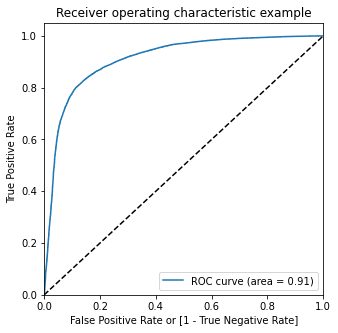

In [114]:
draw_roc(y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_Prob)

####  Finding Optimal Cutoff Point¶

In [115]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_sm_pred_final[i]=y_train_sm_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_sm_pred_final.head()

,Converted,Converted_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.429670,0,1,1,1,1,1,0,0,0,0,0
1,0,0.010746,0,1,0,0,0,0,0,0,0,0,0
2,0,0.130889,0,1,1,0,0,0,0,0,0,0,0
3,0,0.238416,0,1,1,1,0,0,0,0,0,0,0
4,0,0.097466,0,1,0,0,0,0,0,0,0,0,0


In [116]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.713720  0.978472  0.448968
0.2   0.2  0.768870  0.956526  0.581214
0.3   0.3  0.802023  0.927179  0.676866
0.4   0.4  0.824098  0.894860  0.753336
0.5   0.5  0.839085  0.859310  0.818859
0.6   0.6  0.842994  0.813230  0.872759
0.7   0.7  0.831943  0.749687  0.914199
0.8   0.8  0.794308  0.640273  0.948342
0.9   0.9  0.625261  0.269808  0.980713


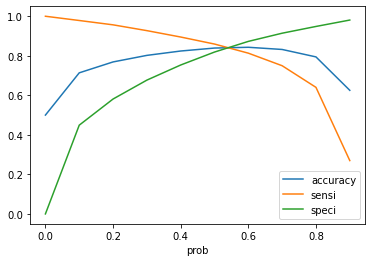

In [117]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the above curve, 0.55 is the optimal point to take cutoff

In [118]:
y_train_sm_pred_final['final_predicted']=y_train_sm_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.55 else 0)
y_train_sm_pred_final.head()

,Converted,Converted_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.429670,0,1,1,1,1,1,0,0,0,0,0,0
1,0,0.010746,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.130889,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.238416,0,1,1,1,0,0,0,0,0,0,0,0
4,0,0.097466,0,1,0,0,0,0,0,0,0,0,0,0


In [119]:
metrics.accuracy_score(y_train_sm_pred_final.Converted, y_train_sm_pred_final.final_predicted)

0.8421861968306923

In [120]:
confusion2 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final.final_predicted )
confusion2

array([[16251,  2933],
       [ 3122, 16062]], dtype=int64)

In [121]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [122]:
#Sensitivity
TP / float(TP+FN)

0.8372602168473728

In [123]:
#Specificity
TN / float(TN+FP)

0.8471121768140116

In [124]:
#False Positive Rate 
print(FP/ float(TN+FP))

0.15288782318598831


In [125]:
# Positive Predictive Value
print (TP / float(TP+FP))

0.8455909449855225


In [126]:
# Negative Predictive Value
print (TN / float(TN+ FN))

0.8388478810715945


#### Precision and Recall

In [127]:
confusion = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final.predicted )
print(confusion)

[[15709  3475]
 [ 2699 16485]]


Precision

In [128]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8259018036072144

Recall

In [129]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8593098415346122

In [130]:
y_train_sm_pred_final.Converted, y_train_sm_pred_final.predicted

(0        0
 1        0
 2        0
 3        0
 4        0
 5        0
 6        0
 7        0
 8        0
 9        0
 10       0
 11       0
 12       0
 13       0
 14       0
 15       0
 16       0
 17       0
 18       0
 19       0
 20       1
 21       0
 22       0
 23       0
 24       0
 25       0
 26       0
 27       0
 28       0
 29       0
 30       0
 31       0
 32       0
 33       0
 34       0
 35       0
 36       1
 37       0
 38       0
 39       0
 40       1
 41       0
 42       0
 43       0
 44       0
 45       0
 46       0
 47       0
 48       0
 49       0
 50       0
 51       0
 52       0
 53       0
 54       0
 55       0
 56       0
 57       0
 58       0
 59       0
 60       0
 61       0
 62       0
 63       0
 64       0
 65       0
 66       0
 67       0
 68       0
 69       0
 70       0
 71       0
 72       0
 73       1
 74       0
 75       0
 76       0
 77       0
 78       0
 79       0
 80       0
 81       0
 82       0
 83 

In [131]:
p, r, thresholds = precision_recall_curve(y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_Prob)

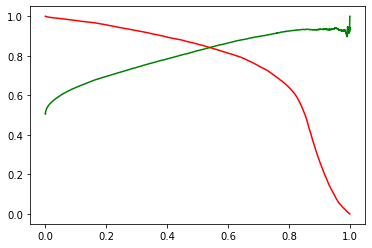

In [132]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

Making Preditions on Test Set

In [133]:
X_test[numeric] = scaler.fit_transform(X_test[numeric])

In [134]:
X_test = X_test[col]
X_test.head()

,arpu_8,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_8,std_og_t2t_mou_6,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_8,isd_og_mou_6,isd_og_mou_7,total_og_mou_7,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_mou_8,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_7,spl_ic_mou_8,ic_others_7,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_6,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,monthly_3g_8,sachet_3g_7,sachet_3g_8,sep_vbc_3g,avg_arpu_6_7,aon_mon
29360,-0.985325,-0.571430,-0.597411,3.179341,0.279336,-0.331236,-0.341784,-0.399577,-0.266104,-0.719810,-0.450428,3.802619,0.643075,-0.437441,-0.153983,-0.052956,-0.048849,-0.169356,0.040743,0.060218,0.002979,0.185539,-0.104068,-0.156590,-0.224123,-0.200892,-0.141536,0.028462,-0.023729,-0.161634,-0.154266,-0.212955,-0.118612,-0.301107,-1.095240,-0.893292,-0.969330,-0.684241,-0.456492,-0.539558,-0.550535,-0.521922,-0.446902,-0.494006,-0.477522,-0.260628,-0.281794,-0.331419,-0.347077,-0.325627,-0.296231,-0.286359,-0.162522,-0.170047,-0.141042,0.016960,-0.728466
49979,-0.657990,2.242560,-0.004167,0.061642,-0.184249,-0.197529,-0.252874,-0.230359,-0.717771,-0.716969,2.187103,0.478655,0.224073,-0.311607,-0.153983,-0.052956,-0.048849,1.469455,-0.609521,-0.586805,-0.708239,-0.369948,-0.364883,-0.775577,1.348061,0.812461,-0.188217,-0.260477,-0.145425,-0.799325,-0.154266,-0.212955,-0.118612,-0.612784,-0.663138,-0.428107,0.533938,1.093259,-0.456492,-0.300395,-0.550535,-0.521922,-0.324719,-0.494006,-0.477522,-0.260628,-0.281794,-0.331419,-0.347077,-0.325627,0.289209,-0.286359,-0.162522,-0.170047,-0.141042,0.168379,-0.427098
90612,0.140812,-0.642028,-0.595214,-0.852063,-0.849542,-0.380765,-0.402751,-0.389105,-0.672567,-0.608747,-0.462990,-0.495789,-0.497201,-0.445874,-0.153983,-0.052956,-0.048849,-1.029127,0.245849,-0.300023,0.132295,-0.085740,-0.276441,-0.129929,-0.224123,-0.200892,-0.227196,-0.364161,-0.544764,-0.286789,-0.154266,-0.212955,-0.118612,-0.716676,-0.447087,0.069362,0.545964,1.107479,0.450548,1.871204,1.834800,1.893980,0.784696,0.786931,2.266999,-0.244379,1.631918,-0.331419,-0.347077,-0.325627,-0.296231,3.219251,-0.162522,-0.170047,-0.141042,-0.401686,1.906702
87007,-0.073854,-0.593163,-0.576408,-0.317095,-0.080554,-0.352281,-0.304971,-0.350406,0.292270,0.143999,-0.462990,-0.492529,-0.405606,-0.445874,-0.153983,-0.052956,-0.048849,-0.433003,0.666724,0.962692,0.535417,-0.308535,-0.214307,0.196270,-0.213485,-0.200892,-0.227196,-0.357202,0.252232,-0.005488,-0.154266,-0.212955,-0.118612,1.672844,2.685652,-0.086189,-0.668677,-0.470941,-0.456492,-0.539558,-0.550535,-0.521922,-0.446902,-0.494006,-0.477522,-0.260628,-0.281794,-0.331419,-0.347077,-0.325627,-0.296231,-0.286359,-0.162522,-0.170047,-0.141042,-0.088708,1.326595
91852,-0.451698,2.539884,2.895208,-0.858783,-0.882213,9.051626,5.964265,6.793591,-0.683775,-0.723874,-0.462990,-0.495789,-0.496426,-0.442678,-0.153983,-0.052956,-0.048849,1.178219,0.615248,-0.008231,-0.051478,-0.184555,-0.232346,-0.231594,-0.198074,-0.200892,-0.227196,-0.290090,-0.333968,-0.344809,-0.154266,-0.212955,-0.118612,0.114461,0.093041,-0.410498,-0.704755,-0.520711,-0.456492,-0.539558,-0.550535,-0.521922,-0.446902,-0.494006,-0.477522,-0.260628,-0.281794,-0.331419,-0.347077,-0.325627,-0.296231,-0.286359,-0.162522,-0.170047,-0.141042,-0.539923,-0.697609


In [135]:
X_test_sm = sm.add_constant(X_test)

In [136]:
y_test_pred = res.predict(X_test_sm)

In [137]:
y_test_pred[:10]

29360    0.786811
49979    0.853045
90612    0.093318
87007    0.122638
91852    0.011385
28100    0.038858
69301    0.952832
50905    0.022673
31097    0.598582
83157    0.948458
dtype: float64

In [138]:
y_pred_1 = pd.DataFrame(y_test_pred)

In [139]:
y_pred_1.head()

,0
29360,0.786811
49979,0.853045
90612,0.093318
87007,0.122638
91852,0.011385


In [140]:
y_test_df = pd.DataFrame(y_test)

In [141]:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [142]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [143]:
y_pred_final.head()

,churn,0
0,0,0.786811
1,0,0.853045
2,0,0.093318
3,0,0.122638
4,0,0.011385


In [144]:
y_pred_final= y_pred_final.rename(columns={ 'churn':'Converted'})

In [145]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [146]:
y_pred_final.head()

,Converted,Converted_Prob
0,0,0.786811
1,0,0.853045
2,0,0.093318
3,0,0.122638
4,0,0.011385


In [175]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.55 else 0)

In [176]:
y_pred_final.head()

,Converted,Converted_Prob,final_predicted
0,0,0.786811,1
1,0,0.853045,1
2,0,0.093318,0
3,0,0.122638,0
4,0,0.011385,0


In [178]:
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8364060417592182

In [179]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[6890, 1344],
       [ 129,  641]], dtype=int64)

In [180]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [181]:
#Sensitivity
TP / float(TP+FN)

0.8324675324675325

In [182]:
#Specificity
TN / float(TN+FP)

0.8367743502550401

## Using Decision Trees

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [148]:
X_train.shape, X_test.shape

((21007, 133), (9004, 133))

In [149]:
dt_base = DecisionTreeClassifier(random_state=42, max_depth=4)

In [150]:
dt_base.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [151]:
y_train_pred = dt_base.predict(X_train)
y_test_pred = dt_base.predict(X_test)

In [152]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      8234
           1       0.74      0.51      0.61       770

    accuracy                           0.94      9004
   macro avg       0.85      0.75      0.79      9004
weighted avg       0.94      0.94      0.94      9004



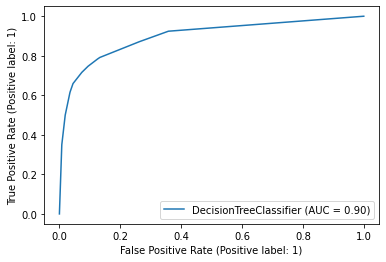

In [153]:
plot_roc_curve(dt_base, X_train, y_train, drop_intermediate=False)
plt.show()

In [154]:
dt = DecisionTreeClassifier(random_state=42)

In [155]:
params = {
    "max_depth": [2,3,5,10,20],
    "min_samples_leaf": [5,10,20,50,100,500]
}

In [156]:
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [157]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 30 candidates, totalling 120 fits
Wall time: 20 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 500]},
             scoring='accuracy', verbose=1)

In [158]:
grid_search.best_score_

0.9377349858867052

In [159]:
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(max_depth=2, min_samples_leaf=5, random_state=42)

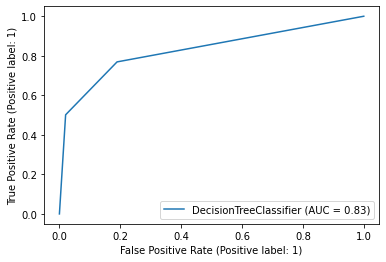

In [160]:
plot_roc_curve(dt_best, X_train, y_train)
plt.show()

## Using Random Forest

In [161]:
rf = RandomForestClassifier(n_estimators=10, max_depth=4, max_features=5, random_state=100, oob_score=True)

In [162]:
%%time
rf.fit(X_train, y_train)

Wall time: 204 ms


RandomForestClassifier(max_depth=4, max_features=5, n_estimators=10,
                       oob_score=True, random_state=100)

In [163]:
rf.oob_score_

0.9322130718331985

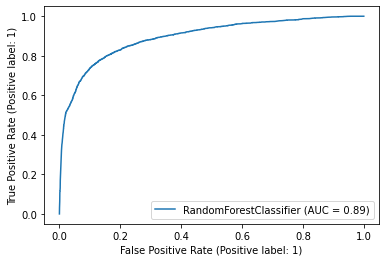

In [164]:
plot_roc_curve(rf, X_train, y_train)
plt.show()

In [165]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [166]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100]
}

In [167]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [168]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 120 candidates, totalling 480 fits
Wall time: 2min 45s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [169]:
grid_search.best_score_

0.9396866868139431

In [170]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=10, min_samples_leaf=10, n_estimators=25,
                       n_jobs=-1, random_state=42)

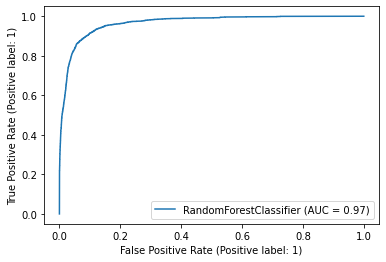

In [171]:
plot_roc_curve(rf_best, X_train, y_train)
plt.show()

In [172]:
rf_best.feature_importances_

array([4.19106994e-03, 1.80896246e-02, 5.08424470e-03, 5.26125015e-03,
       1.95298254e-02, 5.61054594e-03, 4.29246344e-03, 2.10572191e-02,
       1.70368825e-03, 4.29016061e-03, 2.00563337e-02, 1.76305111e-03,
       7.24411041e-03, 1.70052164e-02, 3.66245855e-03, 3.63620135e-03,
       4.34659469e-03, 3.69165330e-03, 9.24992565e-03, 1.58474810e-02,
       1.74349050e-03, 1.55609453e-03, 1.46488072e-03, 1.03790146e-03,
       8.59740368e-04, 6.72499357e-04, 2.74341195e-03, 3.77163118e-03,
       9.90361716e-02, 3.03664117e-03, 4.59097540e-03, 2.25931234e-03,
       3.18602764e-03, 5.43274979e-03, 4.53692012e-03, 5.84706892e-05,
       3.09537965e-06, 3.15489048e-05, 3.42559656e-03, 7.66365638e-03,
       2.77503507e-03, 7.68193235e-04, 5.69816212e-04, 3.53432572e-04,
       2.53897475e-03, 1.98498042e-03, 2.30854884e-03, 1.23386121e-03,
       0.00000000e+00, 0.00000000e+00, 3.15514333e-03, 8.37879089e-03,
       7.40416237e-02, 1.85420980e-03, 3.64784783e-03, 3.35540263e-02,
      

In [173]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

In [174]:
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
28,loc_og_mou_8,0.099036
64,loc_ic_mou_8,0.088083
58,loc_ic_t2m_mou_8,0.077059
52,total_og_mou_8,0.074042
95,max_rech_amt_8,0.066662
79,total_ic_mou_8,0.054265
55,loc_ic_t2t_mou_8,0.033554
92,total_rech_amt_8,0.023830
98,last_day_rch_amt_8,0.022630
7,offnet_mou_8,0.021057


With this, we have completed the modeling phase.

Based on above our Model is having an accuracy of over 80% on train and test data.

### Recommendations

We can understand that, a lot of churn is dependant based on the local in circle calls.

1. Company should introduce Packages for local calls and may be should introduce some free local calls on recharge.

2. Local calls to other operators ia also a big factor.

3. Reduction in recharge costs also will be helpful in retaining Customers.

4. Company should take a note of MOUs of users and may be give some offers to the users where MOU is reducing and parallely, announce offers to thw customers who are loyal to the network.

5. Company should launch some roaming offers also as there some percentage of users who are using the phone on roaming.